<p style="padding: 10px; border: 1px solid black;">
<img src="./utils/MLU-NEW-logo.png" alt="drawing" width="400"/> <br/>

# <a name="0"> Sentence Similarity using AutoGluon</a>
    
Here we introduce the `TextPrediction` task, which helps you automatically train and deploy models for various Natural Language Processing (NLP) problems.
This notebook presents an examples to quickly demonstrate how `TextPrediction` can be used for the NLP task: Refer to [Sentence Similarity](https://arxiv.org/abs/1910.03940) for more details.

The general usage of the TextPredictor is similar to AutoGluon’s TabularPredictor. 
We format NLP datasets as tables where certain columns contain text fields and a special column contains the labels to predict, and each row corresponds to one training example. 
Here, the labels can be discrete categories (classification) or numerical values (regression). 
In fact, TextPredictor also enables training on multi-modal data tables that contain text, numeric and categorical columns and also support solving multilingual problems. 
You may refer to multimodal / multilingual usage in sec_textprediction_multimodal and Text Prediction - Solving Multilingual Problems.

`TextPredictor` fits neural networks to your data via transfer learning from pretrained NLP models like: [BERT](https://arxiv.org/pdf/1810.04805.pdf), [ALBERT](https://arxiv.org/pdf/1909.11942.pdf), and [ELECTRA](https://openreview.net/pdf?id=r1xMH1BtvB).
`TextPredictor` also trains multiple models with different hyperparameters and returns the best model, a process called Hyperparameter Optimization (HPO).

You may refer to multimodal / multilingual usage in [tutorials/multimodal/beginner_text.ipynb](https://github.com/gidler/autogluon-tutorials/blob/main/tutorials/multimodal/beginner_text.ipynb) and [tutorials/multimodal/multilingual_text.ipynb](https://github.com/gidler/autogluon-tutorials/blob/main/tutorials/multimodal/multilingual_text.ipynb).

Note: Please use **GPU** for training, CPU training will lead to an unceasing running script.

### <a href="#Text-Predictor">Text Predictor</a>
    
1. <a href="#Sentence-Similarity-Task">Sentence Similarity Task</a>
2. <a href="#Model-Evaluation-and-Prediction"> Model Evaluation and Prediction </a>   
3. <a href="#Extract-Embeddings"> Extract Embeddings </a>
    
### <a href="#Text-Predictor:-Advanced-Control">Text Predictor: Advanced Control</a>

1. <a href="#Preset-Configurations"> Preset Configurations </a>
2. <a href="#Customize-Hyperparameters"> Customize Hyperparameters </a>

Let's start by loading some libraries and packages!

In [1]:
# # install AutoGluon
# !pip install -q autogluon

In [2]:
%matplotlib inline

# Load in libraries
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
np.random.seed(123)

# <a id="Text-Predictor">Text Predictor</a>

Now let's work with `TextPredictor` to understand how to apply Autogluon on NLP tasks.

(<a href="#0">Go to top</a>)

In [3]:
# Importing the libraries needed to work with our Text dataset.
from autogluon.text import TextPredictor
# # Additional library for tuning
# import autogluon.core as ag

## <a id="Sentence-Similarity-Task">Sentence Similarity Task</a>
Next, let's use AutoGluon to train a model for evaluating how semantically similar two sentences are.

Let's load the dataset into dataframes. For model evaluation, let's further split the training dataset into a training set and a validation set.

(<a href="#0">Go to top</a>)

In [4]:
# Load the training dataset
df_train = pd.read_csv("../data/training.csv")

# Load the test dataset
df_test = pd.read_csv("../data/mlu-leaderboard-test.csv")


train_data, val_data = train_test_split(
    df_train[['item_name_1', 'item_name_2', 'label']],
    test_size=0.10,
    shuffle=True,
    random_state=324,
)

# df_train = df_train.sample(n=subsample_size, random_state=0)
train_data.head()

,item_name_1,item_name_2,label
7199,Gem Stone King 10.00 Ct Round Cut Stunning Cub...,Gem Stone King 10.00 Ct Round Cut Stunning Cub...,0
18532,Orange Circle Studio 2019 Hidden Spiral Agenda...,Orange Circle Studio 2019 Hidden Spiral Agenda...,0
18501,"9"" x 100' Black EPDM 60 mil P & S CURED RUBBER...","FBA 9"" x 100' Black EPDM 60 mil P & S Cured Ru...",1
11334,"Frontier Bulk Lemon Peel Granules, ORGANIC, 1 ...","Frontier Bulk Bac'Uns Vegetarian Bits, ORGANIC...",0
13020,Blue Sea 7242 A-Series Double Pole Toggle - 50...,BLUE SEA SYSTEMS 7242 / Blue Sea 7242 A-Series...,1


In this data, the column named label contains categorical/numerical values (which we'd like to predict) that are human-annotated similarity scores for each given pair of sentences.

In [5]:
print('Min score=', min(train_data['label']), ', Max score=', max(train_data['label']))

Min score= 0 , Max score= 1


Let's train a model to predict these labels. 
Note that we only need to specify the label column and AutoGluon automatically determines the type of prediction problem and an appropriate loss function. 
Once again, you should increase the short `time_limit` below to obtain reasonable performance in your own applications.

In [7]:
predictor = TextPredictor(label='label', path='./AutogluonModels/Text')
predictor.fit(train_data, time_limit=20*60)

Global seed set to 123
Auto select gpus: [0]
Using 16bit native Automatic Mixed Precision (AMP)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name              | Type                         | Params
-------------------------------------------------------------------
0 | model             | HFAutoModelForTextPrediction | 108 M 
1 | validation_metric | AUROC                        | 0     
2 | loss_func         | CrossEntropyLoss             | 0     
-------------------------------------------------------------------
108 M     Trainable params
0         Non-trainable params
108 M     Total params
217.786   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch 0, global step 59: 'val_roc_auc' reached 0.76104 (best 0.76104), saving model to '/home/ec2-user/SageMaker/MLU-WKSP-Tuning-Autogluon/notebooks/AutogluonModels/Text/epoch=0-step=59.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 0, global step 119: 'val_roc_auc' reached 0.79588 (best 0.79588), saving model to '/home/ec2-user/SageMaker/MLU-WKSP-Tuning-Autogluon/notebooks/AutogluonModels/Text/epoch=0-step=119.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 1, global step 179: 'val_roc_auc' reached 0.81554 (best 0.81554), saving model to '/home/ec2-user/SageMaker/MLU-WKSP-Tuning-Autogluon/notebooks/AutogluonModels/Text/epoch=1-step=179.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 1, global step 239: 'val_roc_auc' reached 0.83669 (best 0.83669), saving model to '/home/ec2-user/SageMaker/MLU-WKSP-Tuning-Autogluon/notebooks/AutogluonModels/Text/epoch=1-step=239.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 2, global step 299: 'val_roc_auc' reached 0.84369 (best 0.84369), saving model to '/home/ec2-user/SageMaker/MLU-WKSP-Tuning-Autogluon/notebooks/AutogluonModels/Text/epoch=2-step=299.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 2, global step 359: 'val_roc_auc' reached 0.83940 (best 0.84369), saving model to '/home/ec2-user/SageMaker/MLU-WKSP-Tuning-Autogluon/notebooks/AutogluonModels/Text/epoch=2-step=359.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 3, global step 419: 'val_roc_auc' reached 0.84791 (best 0.84791), saving model to '/home/ec2-user/SageMaker/MLU-WKSP-Tuning-Autogluon/notebooks/AutogluonModels/Text/epoch=3-step=419.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 3, global step 479: 'val_roc_auc' reached 0.84149 (best 0.84791), saving model to '/home/ec2-user/SageMaker/MLU-WKSP-Tuning-Autogluon/notebooks/AutogluonModels/Text/epoch=3-step=479.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 4, global step 539: 'val_roc_auc' reached 0.84661 (best 0.84791), saving model to '/home/ec2-user/SageMaker/MLU-WKSP-Tuning-Autogluon/notebooks/AutogluonModels/Text/epoch=4-step=539.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 4, global step 599: 'val_roc_auc' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 5, global step 659: 'val_roc_auc' reached 0.84706 (best 0.84791), saving model to '/home/ec2-user/SageMaker/MLU-WKSP-Tuning-Autogluon/notebooks/AutogluonModels/Text/epoch=5-step=659.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 5, global step 719: 'val_roc_auc' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 6, global step 779: 'val_roc_auc' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 6, global step 839: 'val_roc_auc' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 7, global step 899: 'val_roc_auc' was not in top 3
Time limit reached. Elapsed time is 0:20:08. Signaling Trainer to stop.


Validation: 0it [00:00, ?it/s]

Start to fuse 3 checkpoints via the greedy soup algorithm.


Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

## <a id="Model-Evaluation-and-Prediction">Model Evaluation and Prediction</a>

We again evaluate our trained model's performance on separate validation data. Below we choose to compute the following metrics: RMSE, Pearson Correlation, and Spearman Correlation.

(<a href="#0">Go to top</a>)

In [8]:
val_score = predictor.evaluate(val_data, metrics=['rmse', 'pearsonr', 'spearmanr'])
print('RMSE = {:.2f}'.format(val_score['rmse']))
print('PEARSONR = {:.4f}'.format(val_score['pearsonr']))
print('SPEARMANR = {:.4f}'.format(val_score['spearmanr']))

Predicting: 0it [00:00, ?it/s]

RMSE = 0.49
PEARSONR = 0.5089
SPEARMANR = 0.5089


In [9]:
predictor.evaluate(val_data, metrics=['acc', 'f1'])

Predicting: 0it [00:00, ?it/s]

{'acc': 0.7613756613756614, 'f1': 0.7132867132867133}

Let's use our model to predict the similarity score between two sentences.

In [10]:
predictor.predict({'item_name_1': [val_data.item_name_1.iloc[0]],
                                'item_name_2': [val_data.item_name_2.iloc[0]]}, as_pandas=False)

Predicting: 0it [00:00, ?it/s]

array([1])

### Prediction on the test data

In [11]:
test_predictions = predictor.predict(df_test[['item_name_1', 'item_name_2']])
test_predictions.head()

Predicting: 0it [00:00, ?it/s]

0    1
1    0
2    0
3    0
4    0
Name: label, dtype: int64

Although the `TextPredictor` currently supports classification and regression tasks, it can directly be used for 
many NLP tasks if you properly format them into a data table. Note that there can be many text columns in this data table. 
Refer to the [TextPredictor documentation](https://auto.gluon.ai/stable/api/autogluon.predictor.html#autogluon.text.TextPredictor.fit) to see all available methods/options.

Unlike `TabularPredictor` which trains/ensembles many different types of models,
`TextPredictor` focuses on fine-tuning deep learning based models. It supports transfer learning from pretrained NLP models like: [BERT](https://arxiv.org/pdf/1810.04805.pdf),
[ALBERT](https://arxiv.org/pdf/1909.11942.pdf), and [ELECTRA](https://openreview.net/pdf?id=r1xMH1BtvB).

**Note:** `TextPredictor` uses `pytorch` as the default backend.

## <a id="Extract-Embeddings">Extract Embeddings</a>
You can also use a trained predictor to extract embeddings that maps each row of the data table to an embedding vector extracted from intermediate neural network representations of the row.

(<a href="#0">Go to top</a>)

In [12]:
embeddings = predictor.extract_embedding(val_data)
print(embeddings.shape)

Predicting: 0it [00:00, ?it/s]

(1890, 768)


Here, we use TSNE to visualize these extracted embeddings. We can see that there are two clusters corresponding to our two labels, since this network has been trained to discriminate between these labels.

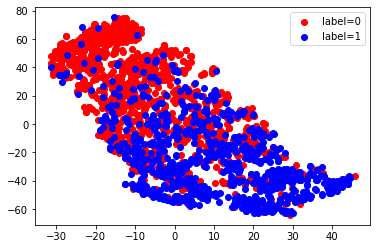

In [13]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, random_state=123).fit_transform(embeddings)
for val, color in [(0, 'red'), (1, 'blue')]:
    idx = (val_data['label'].to_numpy() == val).nonzero()
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], c=color, label=f'label={val}')
plt.legend(loc='best')

# <a id="Text-Predictor-Advanced-Control">Text Prediction - Advanced Control</a>

Now let's introduce the presets of `TextPredictor` and how to customize hyperparameters.

(<a href="#0">Go to top</a>)

## <a id="Preset-Configurations">Preset Configurations</a>

`TextPredictor` provides several simple preset configurations. Let's take a look at the available presets.

(<a href="#0">Go to top</a>)

In [14]:
from autogluon.text.text_prediction.presets import list_text_presets
list_text_presets()

['default',
 'medium_quality_faster_train',
 'high_quality',
 'best_quality',
 'multilingual']

You may be interested in the configuration differences behind the preset strings.

In [15]:
list_text_presets(verbose=True)

{'default': {'model.hf_text.checkpoint_name': 'google/electra-base-discriminator'},
 'medium_quality_faster_train': {'model.hf_text.checkpoint_name': 'google/electra-small-discriminator',
  'optimization.learning_rate': 0.0004},
 'high_quality': {'model.hf_text.checkpoint_name': 'google/electra-base-discriminator'},
 'best_quality': {'model.hf_text.checkpoint_name': 'microsoft/deberta-v3-base',
  'env.per_gpu_batch_size': 2},
 'multilingual': {'model.hf_text.checkpoint_name': 'microsoft/mdeberta-v3-base',
  'optimization.top_k': 1,
  'env.precision': 'bf16',
  'env.per_gpu_batch_size': 4}}

We can find that the main difference between different presets lie in the choices of Huggingface transformer checkpoints. Preset `default` has the same configuration as preset `high_quality`. Designing the presets follows the rule of thumb that larger backbones tend to have better performance but with higher cost.

Let's train a text predictor with preset `medium_quality_faster_train`.

In [16]:
predictor = TextPredictor(eval_metric="acc", label="label")
predictor.fit(
    train_data=train_data,
    presets="medium_quality_faster_train",
    time_limit=60,
)

Global seed set to 123


Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/51.7M [00:00<?, ?B/s]

Auto select gpus: [0]
Using 16bit native Automatic Mixed Precision (AMP)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name              | Type                         | Params
-------------------------------------------------------------------
0 | model             | HFAutoModelForTextPrediction | 13.5 M
1 | validation_metric | Accuracy                     | 0     
2 | loss_func         | CrossEntropyLoss             | 0     
-------------------------------------------------------------------
13.5 M    Trainable params
0         Non-trainable params
13.5 M    Total params
26.967    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch 0, global step 59: 'val_acc' reached 0.66843 (best 0.66843), saving model to '/home/ec2-user/SageMaker/MLU-WKSP-Tuning-Autogluon/notebooks/AutogluonModels/ag-20220805_101318/epoch=0-step=59.ckpt' as top 3
Time limit reached. Elapsed time is 0:01:00. Signaling Trainer to stop.


Validation: 0it [00:00, ?it/s]

Epoch 0, global step 70: 'val_acc' reached 0.68195 (best 0.68195), saving model to '/home/ec2-user/SageMaker/MLU-WKSP-Tuning-Autogluon/notebooks/AutogluonModels/ag-20220805_101318/epoch=0-step=70.ckpt' as top 3
Start to fuse 2 checkpoints via the greedy soup algorithm.


Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Below we report both `f1` and `acc` metrics for our predictions.

In [17]:
predictor.evaluate(val_data, metrics=["f1", "acc"])

Predicting: 0it [00:00, ?it/s]

{'f1': 0.6414108425865447, 'acc': 0.7095238095238096}

The pre-registered configurations provide reasonable default hyperparameters. A common workflow is to first train a model with one of the presets and then tune some hyperparameters to see if the performance can be further improved.

## <a id="Customize-Hyperparameters">Customize Hyperparameters</a>

Customizing hyperparameters is easy for `TextPredictor`. For example, you may want to try backbones beyond those in the presets. Since `TextPredictor` supports loading Huggingface transformers, you can choose any desired text backbones in the [Hugginface model zoo](https://huggingface.co/models), e.g., `prajjwal1/bert-tiny`.

(<a href="#0">Go to top</a>)

In [18]:
predictor = TextPredictor(eval_metric="acc", label="label")
predictor.fit(
    train_data=train_data,
    hyperparameters={
        "model.hf_text.checkpoint_name": "prajjwal1/bert-tiny",
    },
    time_limit=60,
)

Global seed set to 123


Downloading:   0%|          | 0.00/285 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/16.9M [00:00<?, ?B/s]

Auto select gpus: [0]
Using 16bit native Automatic Mixed Precision (AMP)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name              | Type                         | Params
-------------------------------------------------------------------
0 | model             | HFAutoModelForTextPrediction | 4.4 M 
1 | validation_metric | Accuracy                     | 0     
2 | loss_func         | CrossEntropyLoss             | 0     
-------------------------------------------------------------------
4.4 M     Trainable params
0         Non-trainable params
4.4 M     Total params
8.772     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch 0, global step 59: 'val_acc' reached 0.54203 (best 0.54203), saving model to '/home/ec2-user/SageMaker/MLU-WKSP-Tuning-Autogluon/notebooks/AutogluonModels/ag-20220805_101434/epoch=0-step=59.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 0, global step 119: 'val_acc' reached 0.59024 (best 0.59024), saving model to '/home/ec2-user/SageMaker/MLU-WKSP-Tuning-Autogluon/notebooks/AutogluonModels/ag-20220805_101434/epoch=0-step=119.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 1, global step 179: 'val_acc' reached 0.63551 (best 0.63551), saving model to '/home/ec2-user/SageMaker/MLU-WKSP-Tuning-Autogluon/notebooks/AutogluonModels/ag-20220805_101434/epoch=1-step=179.ckpt' as top 3
Time limit reached. Elapsed time is 0:01:00. Signaling Trainer to stop.


Validation: 0it [00:00, ?it/s]

Epoch 1, global step 218: 'val_acc' reached 0.65315 (best 0.65315), saving model to '/home/ec2-user/SageMaker/MLU-WKSP-Tuning-Autogluon/notebooks/AutogluonModels/ag-20220805_101434/epoch=1-step=218.ckpt' as top 3
Start to fuse 3 checkpoints via the greedy soup algorithm.


Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

In [19]:
predictor.evaluate(val_data, metrics=["f1", "acc"])

Predicting: 0it [00:00, ?it/s]

{'f1': 0.472939217318901, 'acc': 0.665079365079365}

`TextPredictor` also supports using the models that are not available in the [Huggingface model zoo](https://huggingface.co/models). To do this, you need to make sure that the models' definition follow Hugginface's AutoModel, AutoConfig, and AutoTokenizer. Let's simulate a local model.

In [20]:
from transformers import AutoModel, AutoConfig, AutoTokenizer
model_key = 'prajjwal1/bert-tiny'
local_path = './AutogluonModels/Text/custom_local_bert_tiny'

model = AutoModel.from_pretrained(model_key)
config = AutoConfig.from_pretrained(model_key)
tokenizer = AutoTokenizer.from_pretrained(model_key)

model.save_pretrained(local_path)
config.save_pretrained(local_path)
tokenizer.save_pretrained(local_path)
os.listdir(local_path)

['special_tokens_map.json',
 'vocab.txt',
 'pytorch_model.bin',
 'tokenizer.json',
 'config.json',
 'tokenizer_config.json']

Now we can use this local model in `TextPredictor`.

In [21]:
from autogluon.text import TextPredictor
predictor = TextPredictor(eval_metric="acc", label="label")
predictor.fit(
    train_data=train_data,
    hyperparameters={
        "model.hf_text.checkpoint_name": "./AutogluonModels/Text/custom_local_bert_tiny",
    },
    time_limit=60,
)

Global seed set to 123
Auto select gpus: [0]
Using 16bit native Automatic Mixed Precision (AMP)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name              | Type                         | Params
-------------------------------------------------------------------
0 | model             | HFAutoModelForTextPrediction | 4.4 M 
1 | validation_metric | Accuracy                     | 0     
2 | loss_func         | CrossEntropyLoss             | 0     
-------------------------------------------------------------------
4.4 M     Trainable params
0         Non-trainable params
4.4 M     Total params
8.772     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch 0, global step 59: 'val_acc' reached 0.54203 (best 0.54203), saving model to '/home/ec2-user/SageMaker/MLU-WKSP-Tuning-Autogluon/notebooks/AutogluonModels/ag-20220805_101543/epoch=0-step=59.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 0, global step 119: 'val_acc' reached 0.59024 (best 0.59024), saving model to '/home/ec2-user/SageMaker/MLU-WKSP-Tuning-Autogluon/notebooks/AutogluonModels/ag-20220805_101543/epoch=0-step=119.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 1, global step 179: 'val_acc' reached 0.63551 (best 0.63551), saving model to '/home/ec2-user/SageMaker/MLU-WKSP-Tuning-Autogluon/notebooks/AutogluonModels/ag-20220805_101543/epoch=1-step=179.ckpt' as top 3
Time limit reached. Elapsed time is 0:01:00. Signaling Trainer to stop.


Validation: 0it [00:00, ?it/s]

Epoch 1, global step 212: 'val_acc' reached 0.64903 (best 0.64903), saving model to '/home/ec2-user/SageMaker/MLU-WKSP-Tuning-Autogluon/notebooks/AutogluonModels/ag-20220805_101543/epoch=1-step=212.ckpt' as top 3
Start to fuse 3 checkpoints via the greedy soup algorithm.


Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

In [22]:
predictor.evaluate(val_data, metrics=["f1", "acc"])

Predicting: 0it [00:00, ?it/s]

{'f1': 0.5341159207630227, 'acc': 0.6640211640211641}

In [23]:
#!rm -r AutogluonModels

<p style="padding: 10px; border: 1px solid black;">
<img src="./utils/MLU-NEW-logo.png" alt="drawing" width="400"/> <br/>

# Thank you!